### GPU, cuda, gccの確認


In [1]:
!nvidia-smi
!nvcc --version
!gcc --version

Thu Dec  4 08:59:58 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.274.02             Driver Version: 535.274.02   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3070 ...    Off | 00000000:01:00.0 Off |                  N/A |
| N/A   49C    P0              N/A /  90W |      8MiB /  8192MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

### パッケージのインストール / クリーンインストール
ssh先のjupyter環境などで実行の場合は, 当該環境にパッケージをインストール

In [2]:
# クリーンが必要であれば実行
!rm -rf kineticEQ
#!rm -rf build

In [3]:
# インストール
!git clone https://github.com/Minamium/kineticEQ.git
!pip install -e ./kineticEQ

Cloning into 'kineticEQ'...
remote: Enumerating objects: 1467, done.
remote: Counting objects: 100% (269/269), done.
remote: Compressing objects: 100% (157/157), done.
remote: Total 1467 (delta 136), reused 215 (delta 89), pack-reused 1198 (from 1)
Receiving objects: 100% (1467/1467), 6.97 MiB | 7.07 MiB/s, done.
Resolving deltas: 100% (759/759), done.
Obtaining file:///home/arlm/workspace/kineticEQ
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for kineticEQ (pyproject.toml) ... done
  Created wheel for kineticEQ: filename=kineticeq-0.4.0-0.editable-py3-none-any.whl size=2710 sha256=b0c512f68b550d038c3d96608a89df3ad3740569023ae89d4ead2e0d29d48a5a
  Stored in directory: /tmp/pip-ephem-wheel-cache-y9d66njf/wheels/5c/8f/4c/777f8eab2b3d762127884b756300580189ab20868ab32d31f6
Successfully built kineticEQ
  Attemp

### 動作確認

--- auto compile ---
--- compile cuSOLVER ---


Detected CUDA files, patching ldflags
Emitting ninja build file build/build.ninja...
/home/arlm/workspace/venv/lib/python3.12/site-packages/torch/utils/cpp_extension.py:2356: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
Building extension module gtsv_batch...
Allowing ninja to set a default number of workers... (overridable by setting the environment variable MAX_JOBS=N)


[1/3] c++ -MMD -MF gtsv_binding.o.d -DTORCH_EXTENSION_NAME=gtsv_batch -DTORCH_API_INCLUDE_EXTENSION_H -DPYBIND11_COMPILER_TYPE=\"_gcc\" -DPYBIND11_STDLIB=\"_libstdcpp\" -DPYBIND11_BUILD_ABI=\"_cxxabi1016\" -I/usr/include/python3.12 -isystem /home/arlm/workspace/venv/lib/python3.12/site-packages/torch/include -isystem /home/arlm/workspace/venv/lib/python3.12/site-packages/torch/include/torch/csrc/api/include -isystem /usr/local/cuda-12.6/include -isystem /usr/include/python3.12 -D_GLIBCXX_USE_CXX11_ABI=1 -fPIC -std=c++17 -O3 -c /home/arlm/workspace/kineticEQ/src/kineticEQ/backends/gtsv/gtsv_binding.cpp -o gtsv_binding.o 
[2/3] /usr/local/cuda-12.6/bin/nvcc --generate-dependencies-with-compile --dependency-output gtsv_batch.cuda.o.d -DTORCH_EXTENSION_NAME=gtsv_batch -DTORCH_API_INCLUDE_EXTENSION_H -DPYBIND11_COMPILER_TYPE=\"_gcc\" -DPYBIND11_STDLIB=\"_libstdcpp\" -DPYBIND11_BUILD_ABI=\"_cxxabi1016\" -I/usr/include/python3.12 -isystem /home/arlm/workspace/venv/lib/python3.12/site-packages

Loading extension module gtsv_batch...
Detected CUDA files, patching ldflags
Emitting ninja build file build/build.ninja...
Building extension module lo_blocktridiag...
Allowing ninja to set a default number of workers... (overridable by setting the environment variable MAX_JOBS=N)


[1/3] c++ -MMD -MF block_tridiag_binding.o.d -DTORCH_EXTENSION_NAME=lo_blocktridiag -DTORCH_API_INCLUDE_EXTENSION_H -DPYBIND11_COMPILER_TYPE=\"_gcc\" -DPYBIND11_STDLIB=\"_libstdcpp\" -DPYBIND11_BUILD_ABI=\"_cxxabi1016\" -I/usr/include/python3.12 -isystem /home/arlm/workspace/venv/lib/python3.12/site-packages/torch/include -isystem /home/arlm/workspace/venv/lib/python3.12/site-packages/torch/include/torch/csrc/api/include -isystem /usr/local/cuda-12.6/include -isystem /usr/include/python3.12 -D_GLIBCXX_USE_CXX11_ABI=1 -fPIC -std=c++17 -O3 -c /home/arlm/workspace/kineticEQ/src/kineticEQ/backends/lo_blocktridiag/block_tridiag_binding.cpp -o block_tridiag_binding.o 
[2/3] /usr/local/cuda-12.6/bin/nvcc --generate-dependencies-with-compile --dependency-output block_tridiag_kernel.cuda.o.d -DTORCH_EXTENSION_NAME=lo_blocktridiag -DTORCH_API_INCLUDE_EXTENSION_H -DPYBIND11_COMPILER_TYPE=\"_gcc\" -DPYBIND11_STDLIB=\"_libstdcpp\" -DPYBIND11_BUILD_ABI=\"_cxxabi1016\" -I/usr/include/python3.12 -isys

Loading extension module lo_blocktridiag...
NoneType: None


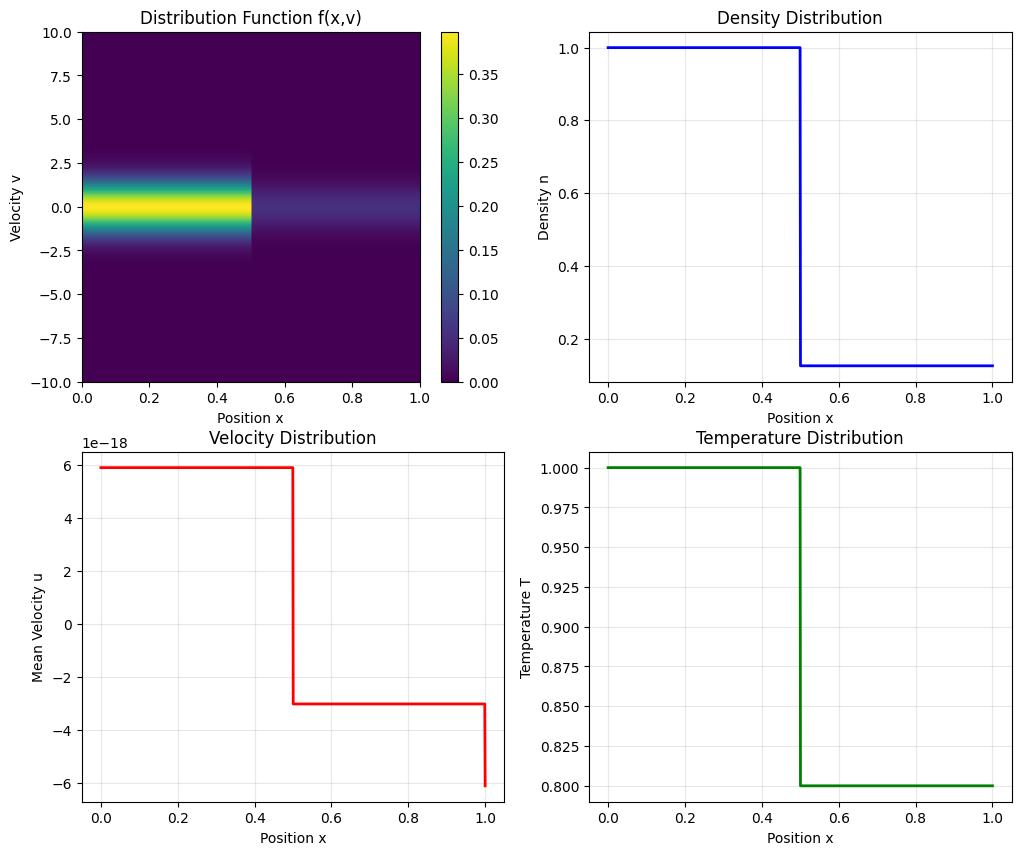

Density: mean=0.5625, min=0.1250, max=1.0000
Velocity: mean=0.0000, min=-0.0000, max=0.0000
Temperature: mean=0.9000, min=0.8000, max=1.0000
--- run simulation ---
--- Starting implicit time evolution ---
CFL number: 4.9950


Implicit Evolution:   0%|          | 0/101 [00:00<?, ?it/s]

Step     0/100 (t=0.000)
Picard iteration:    64, residual: 3.891253e-03
LO iteration: [64, 18, 22, 20, 19, 18, 18, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17], residual: [2.6584174424337905, 2.926514944545655e-07, 7.139210647932881e-07, 9.509333535329123e-07, 6.484875310630578e-07, 7.180868718814626e-07, 7.719303407593969e-07, 9.723191733423953e-07, 9.560511702033647e-07, 9.79297944625479e-07, 7.527589011568914e-07, 7.634633755748688e-07, 7.726155823450931e-07, 7.792475160139922e-07, 7.83284669680917e-07, 7.850237927486958e-07, 7.848661277565228e-07, 7.832000123442207e-07, 7.803591644539587e-07, 7.766153036770085e-07, 7.72184230168893e-07, 7.672357356103277e-07, 7.619033578487588e-07, 7.562926271353909e-07, 7.504875925157251e-07, 7.445558183882817e-07, 7.385521567093711e-07, 7.325215786724293e-07, 7.2650

Implicit Evolution:  10%|▉         | 10/101 [00:47<08:14,  5.43s/it]

Step    10/100 (t=0.005)
Picard iteration:    64, residual: nan
LO iteration: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64], residual: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


Implicit Evolution:  20%|█▉        | 20/101 [01:42<07:31,  5.58s/it]

Step    20/100 (t=0.010)
Picard iteration:    64, residual: nan
LO iteration: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64], residual: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


Implicit Evolution:  30%|██▉       | 30/101 [02:38<06:36,  5.58s/it]

Step    30/100 (t=0.015)
Picard iteration:    64, residual: nan
LO iteration: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64], residual: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


Implicit Evolution:  40%|███▉      | 40/101 [03:34<05:40,  5.58s/it]

Step    40/100 (t=0.020)
Picard iteration:    64, residual: nan
LO iteration: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64], residual: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


Implicit Evolution:  50%|████▉     | 50/101 [04:30<04:44,  5.58s/it]

Step    50/100 (t=0.025)
Picard iteration:    64, residual: nan
LO iteration: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64], residual: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


Implicit Evolution:  59%|█████▉    | 60/101 [05:26<03:48,  5.58s/it]

Step    60/100 (t=0.030)
Picard iteration:    64, residual: nan
LO iteration: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64], residual: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


Implicit Evolution:  69%|██████▉   | 70/101 [06:21<02:52,  5.57s/it]

Step    70/100 (t=0.035)
Picard iteration:    64, residual: nan
LO iteration: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64], residual: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


Implicit Evolution:  79%|███████▉  | 80/101 [07:17<01:56,  5.57s/it]

Step    80/100 (t=0.040)
Picard iteration:    64, residual: nan
LO iteration: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64], residual: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


Implicit Evolution:  89%|████████▉ | 90/101 [08:13<01:01,  5.57s/it]

Step    90/100 (t=0.045)
Picard iteration:    64, residual: nan
LO iteration: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64], residual: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


Implicit Evolution:  99%|█████████▉| 100/101 [09:08<00:05,  5.57s/it]

Step   100/100 (t=0.050)
Picard iteration:    64, residual: nan
LO iteration: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64], residual: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


Implicit Evolution: 100%|██████████| 101/101 [09:14<00:00,  5.49s/it]

Time evolution completed!
--- run simulation complete, Result is saved in self.f ---


<Figure size 640x480 with 0 Axes>

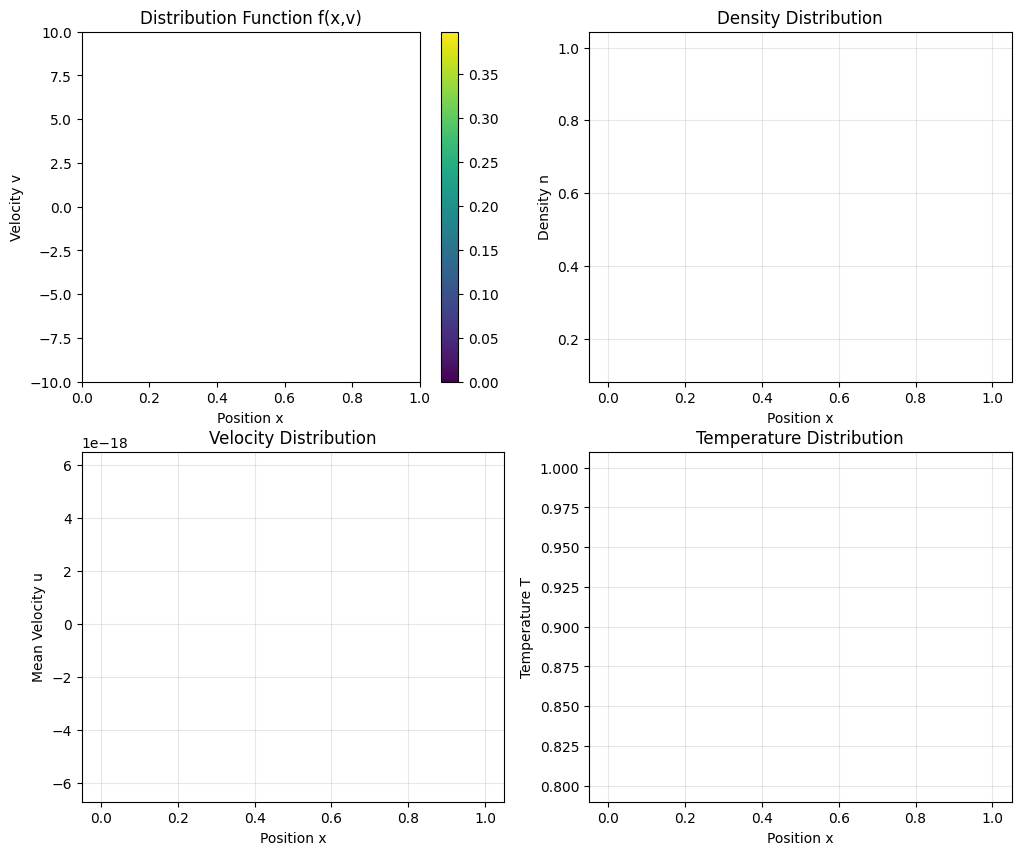

Density: mean=nan, min=nan, max=nan
Velocity: mean=nan, min=nan, max=nan
Temperature: mean=nan, min=nan, max=nan
Creating GIF with 11 frames...
  Frame 3/11 processed
  Frame 6/11 processed
  Frame 9/11 processed
GIF saved: 'base_bench.gif' (11 frames)


<Figure size 640x480 with 0 Axes>

In [4]:
# import packages
%run kineticEQ/tests/base/base_test.py --T_total 0.05 --tau_tilde 5e-6 --dt 5e-4 --lo_iter 64 --lo_tol 1e-6 --ho_iter 64 --ho_tol 1e-6